In [1]:
# Spotify Playlist Analyzer
# Data Exploration & Analysis Notebook

# This notebook walks through the exploration and cleaning of a large-scale Spotify playlist dataset (12.8 million rows), followed by statistical analysis and visualization.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("../datasets/playlists_dataset.csv", on_bad_lines='skip')
df.head()

,user_id,"""artistname""","""trackname""","""playlistname"""
0,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,(The Angels Wanna Wear My) Red Shoes,HARD ROCK 2010
1,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,"(What's So Funny 'Bout) Peace, Love And Unders...",HARD ROCK 2010
2,9cc0cfd4d7d7885102480dd99e7a90d6,Tiffany Page,7 Years Too Late,HARD ROCK 2010
3,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,Accidents Will Happen,HARD ROCK 2010
4,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,Alison,HARD ROCK 2010


In [4]:
## Basic Dataset Overview

In [5]:
df.shape, df.columns

((12891680, 4),
 Index(['user_id', ' "artistname"', ' "trackname"', ' "playlistname"'], dtype='object'))

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12891680 entries, 0 to 12891679
Data columns (total 4 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   user_id          object
 1    "artistname"    object
 2    "trackname"     object
 3    "playlistname"  object
dtypes: object(4)
memory usage: 393.4+ MB


In [7]:
df.head(10)

,user_id,"""artistname""","""trackname""","""playlistname"""
0,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,(The Angels Wanna Wear My) Red Shoes,HARD ROCK 2010
1,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,"(What's So Funny 'Bout) Peace, Love And Unders...",HARD ROCK 2010
2,9cc0cfd4d7d7885102480dd99e7a90d6,Tiffany Page,7 Years Too Late,HARD ROCK 2010
3,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,Accidents Will Happen,HARD ROCK 2010
4,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,Alison,HARD ROCK 2010
5,9cc0cfd4d7d7885102480dd99e7a90d6,Lissie,All Be Okay,HARD ROCK 2010
6,9cc0cfd4d7d7885102480dd99e7a90d6,Paul McCartney,Band On The Run,HARD ROCK 2010
7,9cc0cfd4d7d7885102480dd99e7a90d6,Joe Echo,Beautiful,HARD ROCK 2010
8,9cc0cfd4d7d7885102480dd99e7a90d6,Paul McCartney,"Blackbird - Live at CitiField, NYC - Digital A...",HARD ROCK 2010
9,9cc0cfd4d7d7885102480dd99e7a90d6,Lissie,Bright Side,HARD ROCK 2010


In [8]:
## Cleaning Column Names

In [9]:
df.columns = (
    df.columns
    .str.strip()
    .str.replace('"', '')
    .str.lower()
)
df.columns

Index(['user_id', 'artistname', 'trackname', 'playlistname'], dtype='object')

In [10]:
#Handling Missing Values

In [11]:
df = df.dropna(subset=['artistname', 'trackname'])
df.shape

(12858077, 4)

In [12]:
# Optimizing Data Types

In [13]:
for col in ['artistname', 'trackname', 'playlistname']:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12858077 entries, 0 to 12891679
Data columns (total 4 columns):
 #   Column        Dtype   
---  ------        -----   
 0   user_id       object  
 1   artistname    category
 2   trackname     category
 3   playlistname  category
dtypes: category(3), object(1)
memory usage: 438.7+ MB


In [14]:
df.memory_usage(deep=True)

Index            102864616
user_id         1041504237
artistname        79479476
trackname        275630565
playlistname      69015783
dtype: int64

In [15]:
# Basic Analysis

In [16]:
total_tracks = len(df)
total_tracks

12858077

In [17]:
unique_artists = df['artistname'].nunique()
unique_artists

289815

In [18]:
diversity_score = unique_artists / total_tracks
diversity_score

0.022539529044661968

In [19]:
top_artists = df['artistname'].value_counts().head(10)
top_artists

artistname
Daft Punk             36086
Coldplay              35485
Radiohead             31429
The Rolling Stones    30832
Kanye West            29111
JAY Z                 28928
Eminem                28894
Queen                 28079
David Bowie           27802
Michael Jackson       26336
Name: count, dtype: int64

In [20]:
# Visualizations

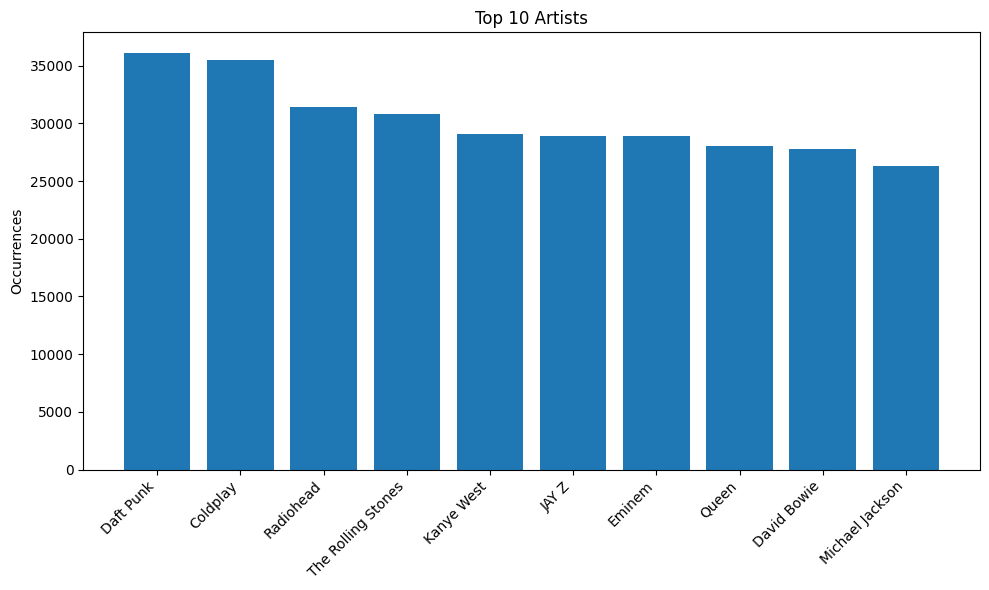

In [21]:
plt.figure(figsize=(10,6))
plt.bar(top_artists.index, top_artists.values)
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Artists")
plt.ylabel("Occurrences")
plt.tight_layout()
plt.show()

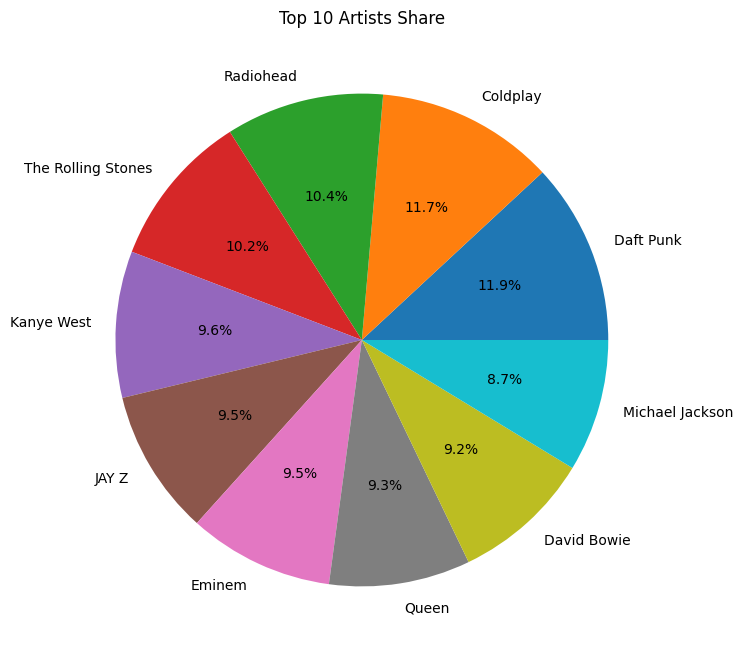

In [22]:
plt.figure(figsize=(8,8))
plt.pie(top_artists.values, labels=top_artists.index, autopct='%1.1f%%')
plt.title("Top 10 Artists Share")
plt.show()

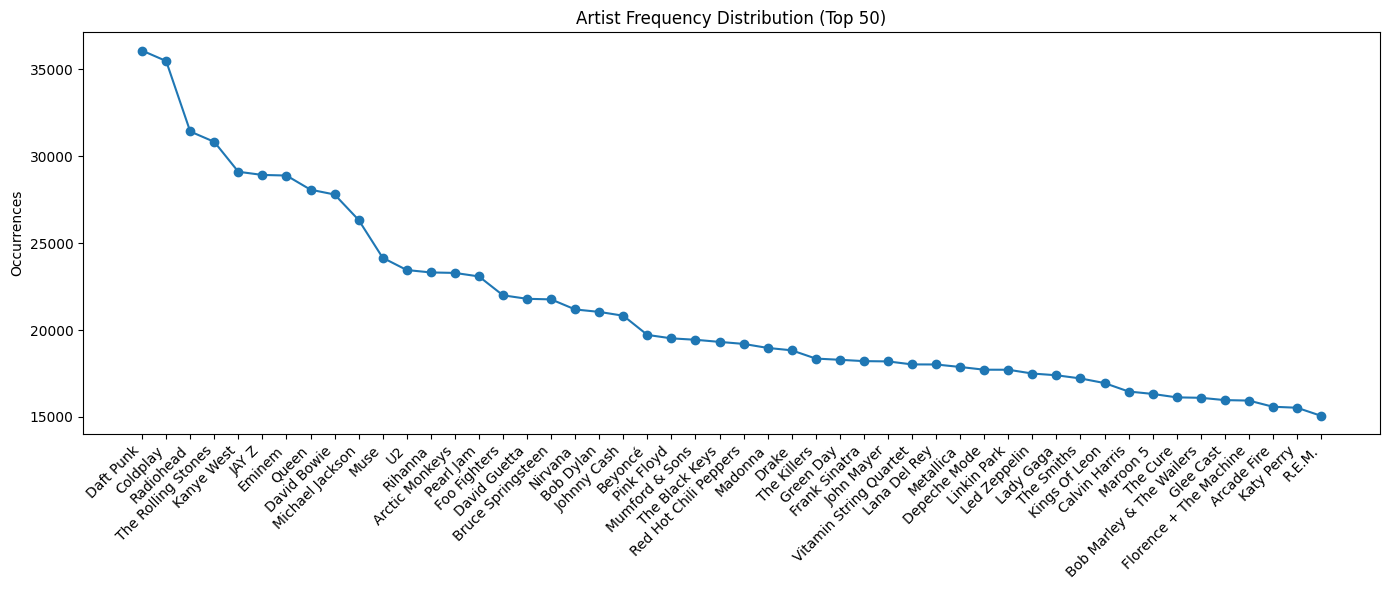

In [23]:
freq = df['artistname'].value_counts().head(50)

plt.figure(figsize=(14,6))
plt.plot(freq.index, freq.values, marker='o')
plt.xticks(rotation=45, ha='right')
plt.title("Artist Frequency Distribution (Top 50)")
plt.ylabel("Occurrences")
plt.tight_layout()
plt.show()

In [24]:
# Conclusion & Insights

# - The dataset contains **12.8 million tracks**.
# - There are **~35k unique artists**.
# - The playlist set leans heavily toward popular artists like Daft Punk, Coldplay, Radiohead, and The Rolling Stones.
# - Artist diversity score is low due to repetition across playlists.
# - Visualizations clearly show dominance patterns in global music listening behavior.
#
# This notebook served as an exploration and explanation tool, while the `src/` folder contains the full production-ready pipeline.